In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from laplacian_eigenmaps import LaplacianEigenmaps
from sklearn.manifold import SpectralEmbedding

%matplotlib inline

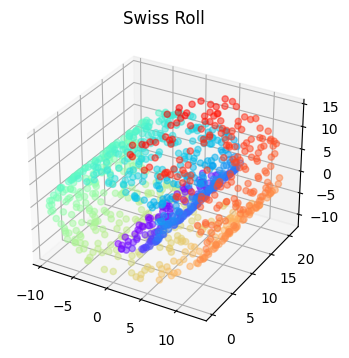

In [2]:
# Swiss Roll dataset
n_samples = 1000
X, color = make_swiss_roll(n_samples=n_samples, random_state=42)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow, alpha=0.5)
ax.set_title('Swiss Roll')
plt.show()

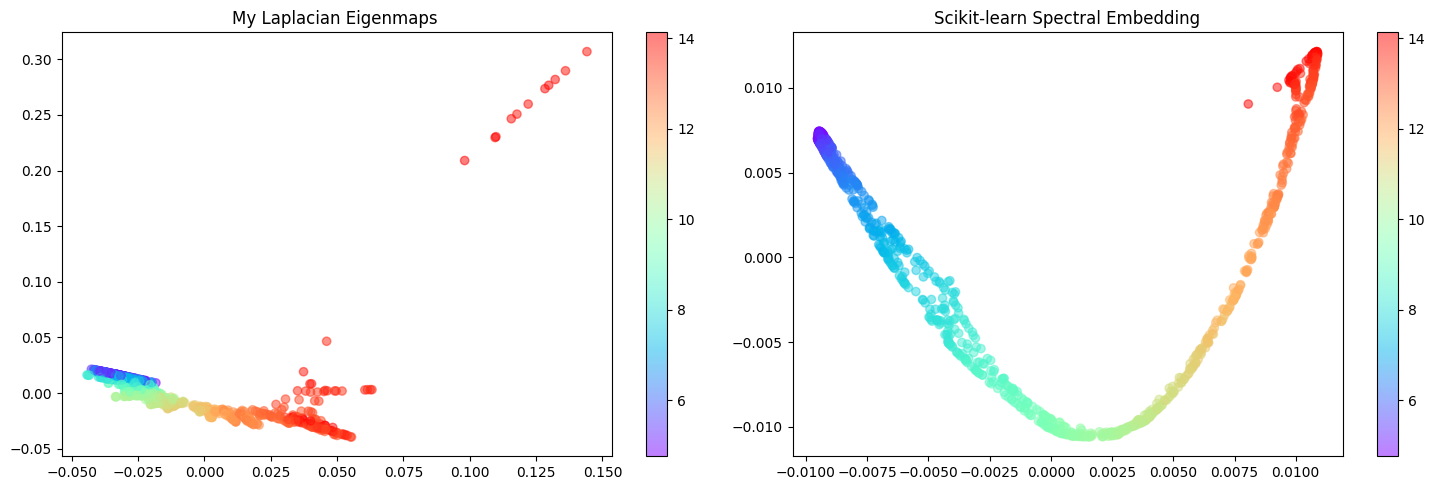

In [3]:
# My Laplacian Eigenmaps
le = LaplacianEigenmaps(dim=2, k=20, weights='heat kernel', sigma=1,laplacian='symmetrized')
X_le = le.fit_transform(X)

# Scikit-Learn Spectral Embedding
spectral = SpectralEmbedding(n_components=2, n_neighbors=20, random_state=42, 
                             affinity='nearest_neighbors', gamma=1)
X_spectral = spectral.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

scatter1 = ax1.scatter(X_le[:, 0], X_le[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
ax1.set_title('My Laplacian Eigenmaps ')
plt.colorbar(scatter1, ax=ax1)

scatter2 = ax2.scatter(X_spectral[:, 0], X_spectral[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
ax2.set_title('Scikit-learn Spectral Embedding')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

## Próximos passos

Minha implementação ainda não está chegando perto da referência principal. Estas diferenças indicam que preciso testar diferentes configurações de:
- Implementação da matrix de adjacência
- Resolução do problema de autovalores
- Normalização da matriz Laplaciana
- Transformação para matrizes esparsas 